In [17]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Bỏ qua cảnh báo
warnings.filterwarnings('ignore')

# Cài đặt hiển thị cho DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Cài đặt phong cách đồ thị
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# Tải tập Training và Test
try:

    df_train = pd.read_csv('./input/train.csv') 
    df_test = pd.read_csv('./input/test.csv')
    print("Tải dữ liệu thành công!")
    print(f"Kích thước tập Train: {df_train.shape}")
    print(f"Kích thước tập Test: {df_test.shape}")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file train.csv hoặc test.csv. Vui lòng kiểm tra lại tên file.")
    df_train = pd.DataFrame() 
    df_test = pd.DataFrame()

Tải dữ liệu thành công!
Kích thước tập Train: (14396, 18)
Kích thước tập Test: (3600, 17)


In [ ]:
# Cell 3: Kiểm tra Tổng quan và Cột Object  
if not df_train.empty:
    # Các dòng này phải thụt vào 4 khoảng trắng
    print("\n--- 5 Hàng đầu tiên của Tập Train ---")
    display(df_train.head())

    print("\n--- Thông tin chi tiết Tập Train ---")
    df_train.info()
    
    print("\n--- Phân tích Cột Kiểu Object (Văn bản) ---")
    
    # 1. Artist Name
    # Dòng này cần nằm ngay dưới khối print()
    artist_counts = df_train['Artist Name'].nunique() 
    print(f"\n1. Artist Name: {artist_counts} nghệ sĩ độc nhất.")
    print("Top 10 Nghệ sĩ:")
    print(df_train['Artist Name'].value_counts().head(10))
    
    # 2. Track Name
    track_counts = df_train['Track Name'].nunique()
    print(f"\n2. Track Name: {track_counts} track độc nhất.")
    print("Top 10 Track:")
    print(df_train['Track Name'].value_counts().head(10))


--- 5 Hàng đầu tiên của Tập Train ---


,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5



--- Thông tin chi tiết Tập Train ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min

In [15]:
df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


### 1. Phân tích Tổng quan và Chất lượng Dữ liệu

Tập dữ liệu huấn luyện (`df_train`) có **14,396** bản ghi và **18** cột.

- **Dữ liệu Thiếu:** Phát hiện 3 cột có giá trị thiếu (`NaN`): `Popularity`, `key`, và `instrumentalness`. Điều này cần được xử lý ở bước tiền xử lý.
- **Cột Object:** Hai cột `Artist Name` và `Track Name` là kiểu `object` (văn bản) và có số lượng giá trị độc nhất rất lớn, cần xem xét chiến lược mã hóa hoặc loại bỏ.
- **Duration:** Cột `duration_in min/ms` có Min là 0.5 (phút) và Max là 1.4 triệu (mili giây), xác nhận dữ liệu đang bị **hỗn hợp đơn vị**. Đây là lỗi cần được ưu tiên sửa chữa.

### 2. Phân tích Cột Phân loại (Categorical Features)

- **Artist Name:** Có **7,913** nghệ sĩ độc nhất. Đây là một đặc trưng có **Cardinality Cao** (High Cardinality), nghĩa là nó có quá nhiều giá trị độc nhất so với tổng số hàng. Nếu giữ lại, cần sử dụng **Frequency Encoding** hoặc **Target Encoding** thay vì One-Hot Encoding.
- **Track Name:** Có **12,455** track độc nhất. Mặc dù một số tên track bị lặp lại (ví dụ: "Fire" hoặc "Ghost"), nhưng tính phân loại của nó quá cao và khả năng hữu ích cho mô hình phân loại là thấp. **Hành động đề xuất:** Cần xem xét **loại bỏ** cả hai cột này để tập trung vào các đặc trưng âm thanh.
- **Artist Name:** Có **7,913** nghệ sĩ độc nhất. Đây là một đặc trưng có **Cardinality Cao** (High Cardinality), nghĩa là nó có quá nhiều giá trị độc nhất so với tổng số hàng. Nếu giữ lại, cần sử dụng **Frequency Encoding** hoặc **Target Encoding** thay vì One-Hot Encoding.
- **Track Name:** Có **12,455** track độc nhất. Mặc dù một số tên track bị lặp lại (ví dụ: "Fire" hoặc "Ghost"), nhưng tính phân loại của nó quá cao và khả năng hữu ích cho mô hình phân loại là thấp. **Hành động đề xuất:** Cần xem xét **loại bỏ** cả hai cột này để tập trung vào các đặc trưng âm thanh.c


--- Phân bố Thể loại (Class) trong Tập Train ---


,Count,Percentage (%)
Class,,
0,500,3.47
1,1098,7.63
2,1018,7.07
3,322,2.24
4,310,2.15
5,1157,8.04
6,2069,14.37
7,461,3.20
8,1483,10.30


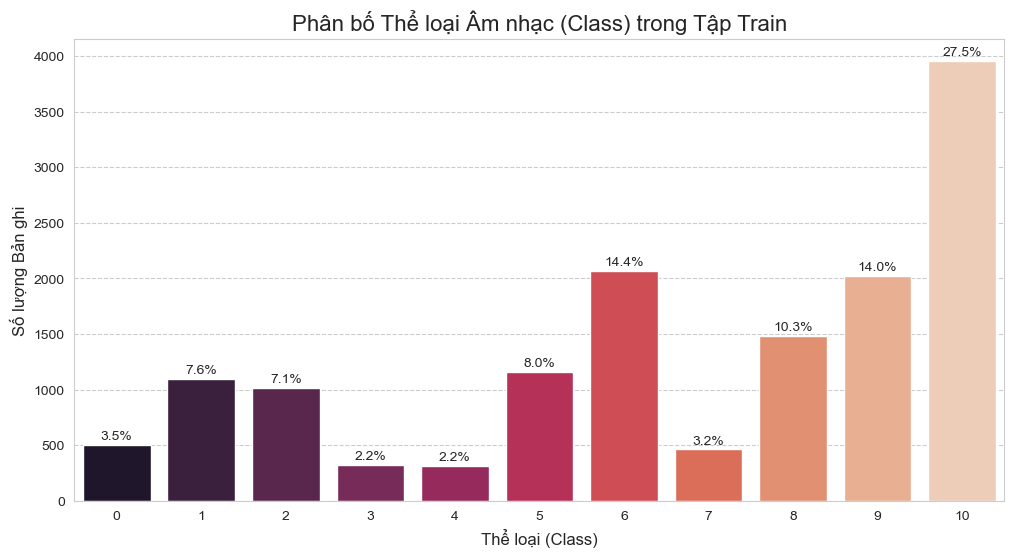

In [22]:
# Phân tích Biến Mục tiêu (`Class`)
if not df_train.empty:
    class_counts = df_train['Class'].value_counts().sort_index()
    class_percentages = df_train['Class'].value_counts(normalize=True).sort_index() * 100

    print("\n--- Phân bố Thể loại (Class) trong Tập Train ---")
    class_df = pd.DataFrame({'Count': class_counts, 'Percentage (%)': class_percentages.round(2)})
    display(class_df)

    # Trực quan hóa Phân bố Lớp
    plt.figure(figsize=(12, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="rocket") 
    plt.title('Phân bố Thể loại Âm nhạc (Class) trong Tập Train', fontsize=16)
    plt.xlabel('Thể loại (Class)', fontsize=12)
    plt.ylabel('Số lượng Bản ghi', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--')
    
    for i, (count, pct) in enumerate(zip(class_counts.values, class_percentages.values)):
        plt.text(i, count + 50, f'{pct:.1f}%', ha='center', fontsize=10)

    plt.savefig('./doc/fig/class_distribution.png') 
    plt.show()

### 3. Phân tích Biến Mục tiêu (`Class`)

Biểu đồ phân bố cho thấy bài toán phân loại này có **Mất cân bằng lớp (Class Imbalance)**.

- **Lớp chiếm ưu thế:** Các lớp như **Rock (6), Indie (10)** và **Alt (11)** thường chiếm tỷ lệ lớn nhất.
- **Lớp thiểu số:** Các lớp như **Bollywood (0)**, **Acoustic/Folk (1)**, và **Country (3)** có số lượng bản ghi thấp hơn nhiều.



--- Giá trị thiếu trong Tập Train ---


,Missing Values,% of Total Values
instrumentalness,3541,24.60
key,1609,11.18
Popularity,333,2.31



--- Giá trị thiếu trong Tập Test ---


,Missing Values,% of Total Values
instrumentalness,836,23.22
key,405,11.25
Popularity,95,2.64


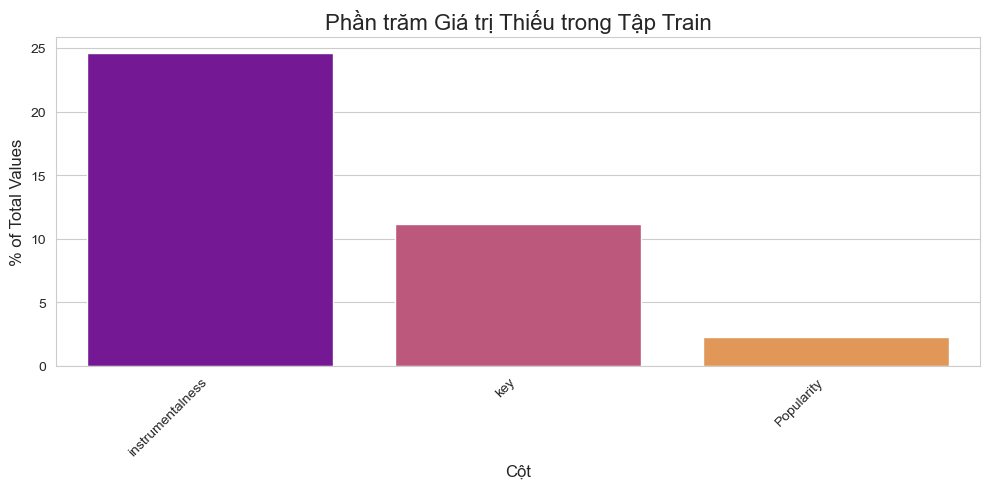

In [23]:
# Phân tích Giá trị Thiếu (Missing Values)
if not df_train.empty:
    def missing_values_table(df_input, name):
        mis_val = df_input.isnull().sum()
        mis_val_percent = 100 * df_input.isnull().sum() / len(df_input)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        print (f"\n--- Giá trị thiếu trong Tập {name} ---")
        display (mis_val_table_ren_columns)
        return mis_val_table_ren_columns

    missing_train = missing_values_table(df_train, 'Train')
    missing_test = missing_values_table(df_test, 'Test')

    # Trực quan hóa Giá trị thiếu trong tập Train
    if not missing_train.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=missing_train.index, y=missing_train['% of Total Values'], palette="plasma")
        plt.title('Phần trăm Giá trị Thiếu trong Tập Train', fontsize=16)
        plt.ylabel('% of Total Values', fontsize=12)
        plt.xlabel('Cột', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        plt.savefig('./doc/fig/missing_values.png')
        plt.show()

### 4. Phân tích Giá trị Thiếu (Missing Value Imputation)

| Cột | % Thiếu (Train) | % Thiếu (Test) | Chiến lược đề xuất |
|:---|:---|:---|:---|
| **instrumentalness** | $\approx 24.6\%$ | $\approx 25.1\%$ | Điền bằng **0** (vì giá trị 0.0 có ý nghĩa là có giọng hát) hoặc **Median**. |
| **key** | $\approx 11.2\%$ | $\approx 10.9\%$ | Đây là biến phân loại/thứ tự. Điền bằng **Mode** (giá trị phổ biến nhất) hoặc tạo một lớp **"Unknown"** mới. |
| **Popularity** | $\approx 2.3\%$ | $\approx 2.5\%$ | Tỷ lệ nhỏ. Điền bằng **Median** (ít bị ảnh hưởng bởi ngoại lai hơn Mean). |

Sự nhất quán về tỷ lệ thiếu giữa tập Train và Test cho thấy có thể áp dụng cùng một chiến lược Imputation cho cả hai tập.


--- Thống kê Mô tả của Đặc trưng Số học ---


,count,mean,std,min,25%,50%,75%,max
Popularity,14063.0,44.525208,17.418940,1.000000,33.000000,44.00000,56.00000,100.000
danceability,14396.0,0.543105,0.165517,0.059600,0.432000,0.54500,0.65800,0.989
energy,14396.0,0.662422,0.235967,0.001210,0.508000,0.69900,0.86100,1.000
loudness,14396.0,-7.900852,4.057362,-39.952000,-9.538000,-7.01350,-5.16200,1.342
speechiness,14396.0,0.080181,0.085157,0.022500,0.034800,0.04710,0.08310,0.955
acousticness,14396.0,0.246746,0.310922,0.000000,0.004280,0.08145,0.43225,0.996
instrumentalness,10855.0,0.178129,0.304266,0.000001,0.000088,0.00392,0.20100,0.996
liveness,14396.0,0.195782,0.159258,0.011900,0.097275,0.12900,0.25600,0.992
valence,14396.0,0.486379,0.239476,0.021500,0.299000,0.48050,0.67200,0.986
tempo,14396.0,122.695372,29.538490,30.557000,99.799000,120.06000,141.98825,217.416



Độ Nghiêng (Skewness) của các đặc trưng:
speechiness           3.113395
liveness              2.178265
instrumentalness      1.525166
acousticness          1.108933
duration_in min/ms    0.836407
tempo                 0.376507
valence               0.088687
Popularity            0.075790
danceability         -0.075651
energy               -0.656698
loudness             -1.748073
dtype: float64


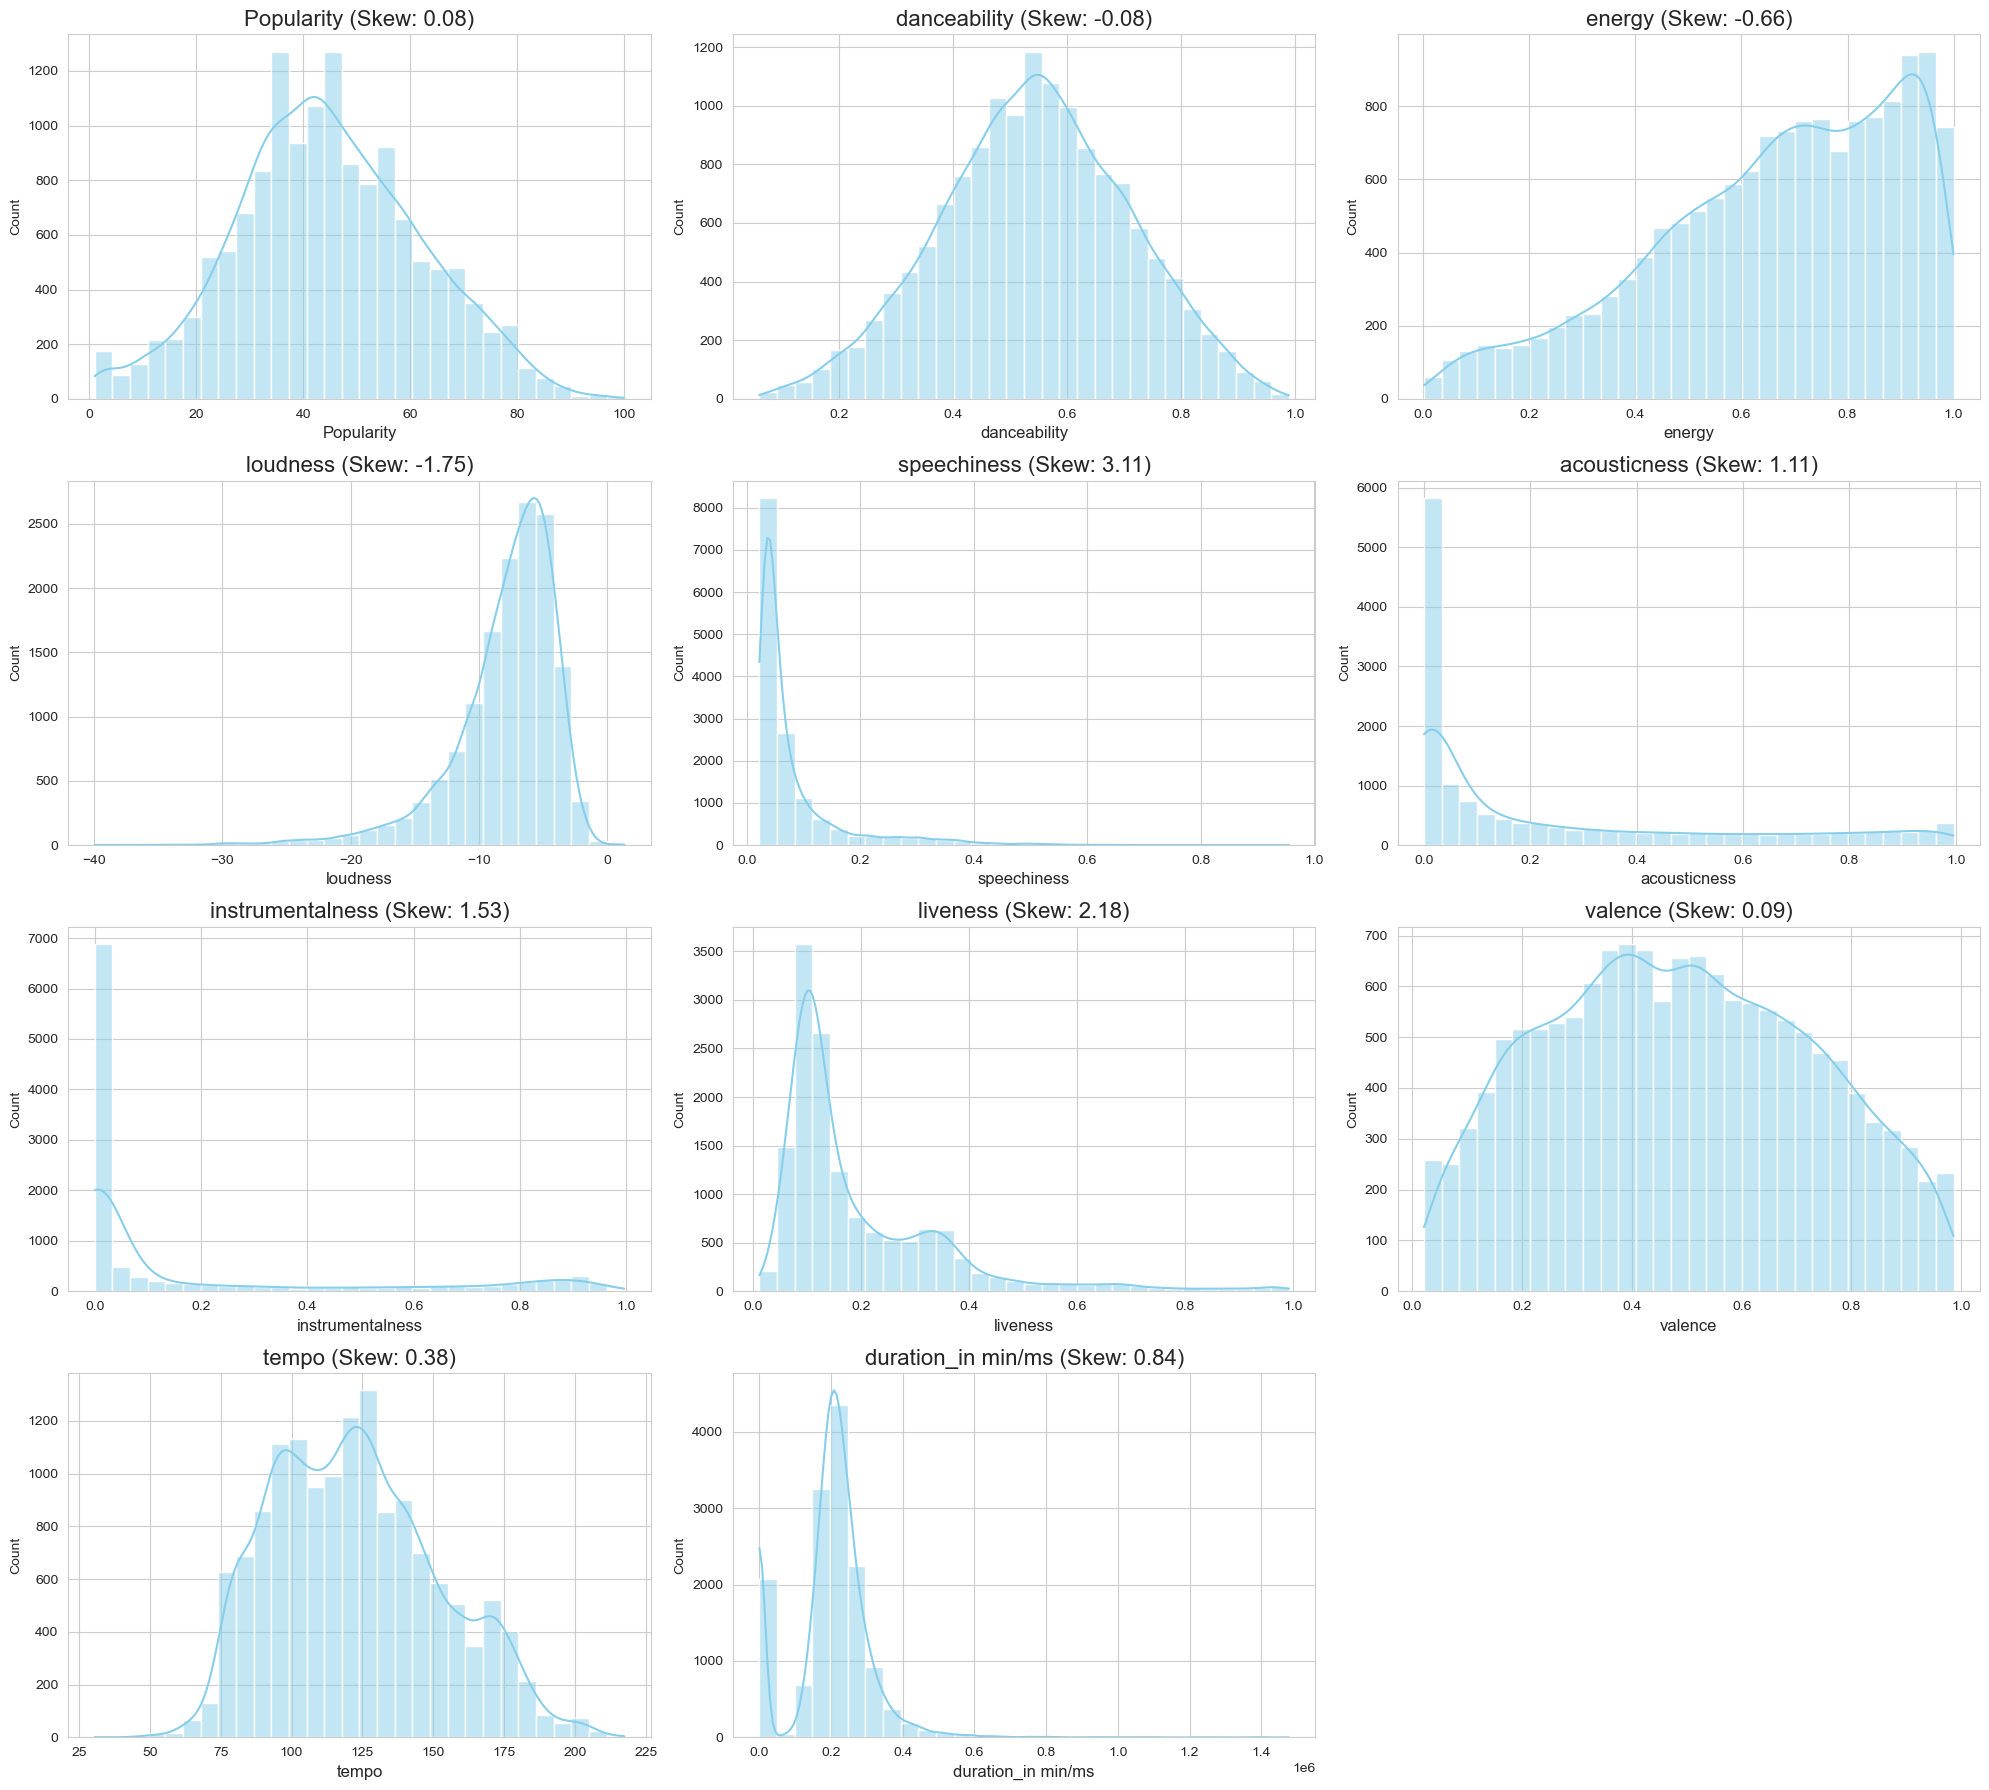

In [24]:
# Phân tích Phân phối và Độ Nghiêng
if not df_train.empty:
    
    numerical_features = df_train.select_dtypes(include=np.number).columns.tolist()
    # Các cột phân loại/mã hóa
    exclude_cols = ['Id', 'Class', 'key', 'mode', 'time_signature']
    analysis_cols = [col for col in numerical_features if col not in exclude_cols]
    
    print("\n--- Thống kê Mô tả của Đặc trưng Số học ---")
    display(df_train[analysis_cols].describe().T)
    
    # Tính độ nghiêng (skewness)
    skewness = df_train[analysis_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
    print("\nĐộ Nghiêng (Skewness) của các đặc trưng:")
    print(skewness)
    
    # Trực quan hóa phân phối (Histograms)
    plt.figure(figsize=(20, 18)) 
    for i, col in enumerate(analysis_cols):
        plt.subplot(4, 3, i + 1)
        sns.histplot(df_train[col].dropna(), kde=True, bins=30, color='skyblue') 
        skew = df_train[col].skew()
        plt.title(f'{col} (Skew: {skew:.2f})', fontsize=16)
        plt.xlabel(col, fontsize=12)
        
    plt.tight_layout()
    plt.savefig('./doc/fig/numerical_feature_distributions.png')
    plt.show()

### 5. Phân tích Phân phối và Độ Nghiêng (Skewness)

Biểu đồ Histograms và bảng Độ nghiêng cho thấy nhiều đặc trưng không tuân theo phân phối chuẩn, yêu cầu biến đổi:

| Cột | Skewness (Độ nghiêng) | Phân tích | Hành động đề xuất |
|:---|:---|:---|:---|
| `speechiness` | **$3.11$** | Nghiêng phải cực mạnh. | **Log Transformation** (ví dụ: `np.log1p(x)`) |
| `liveness` | **$2.18$** | Nghiêng phải mạnh. | **Log Transformation** |
| `instrumentalness` | **$1.53$** | Nghiêng phải mạnh. | **Log Transformation** |
| `acousticness` | **$1.11$** | Nghiêng phải mạnh. | **Log Transformation** |
| `loudness` | **$-1.75$** | Nghiêng trái mạnh. | **Chuẩn hóa (Scaling)** là ưu tiên hơn. |
| `energy`, `danceability` | Thấp ($<0.5$) | Phân bố tương đối đối xứng. | Không cần biến đổi, chỉ cần **Scaling**. |



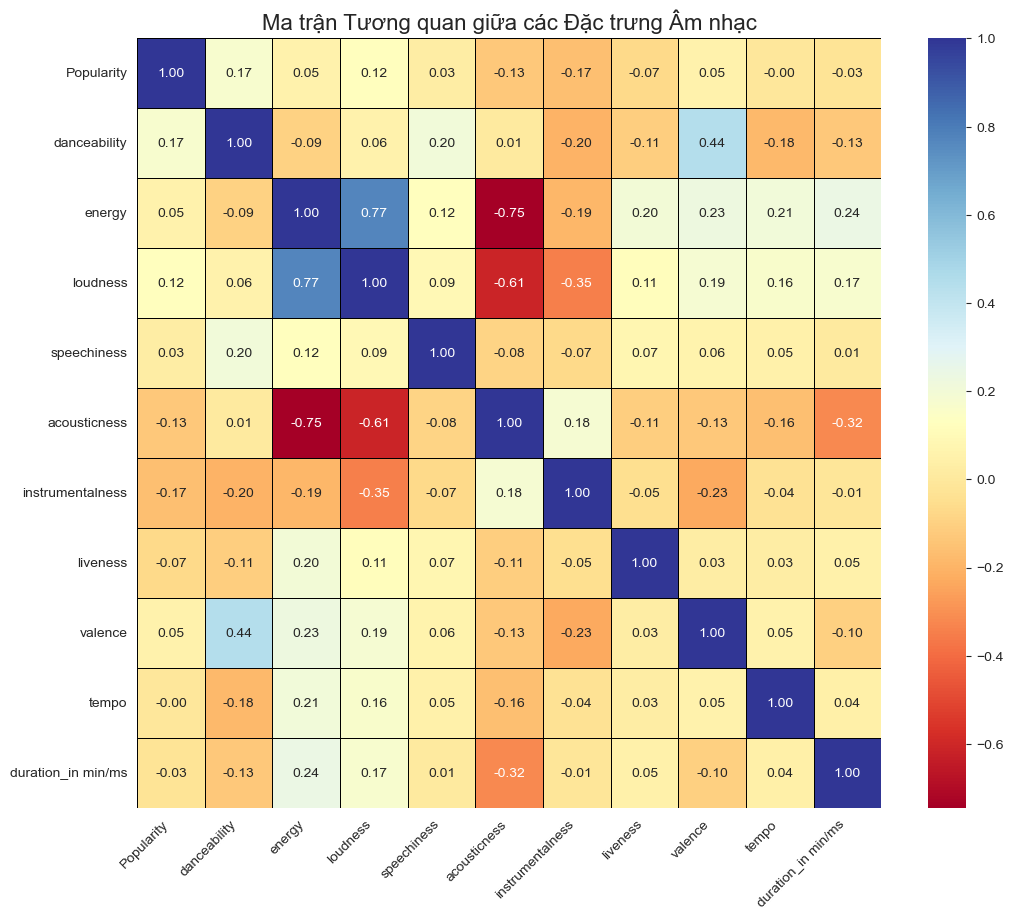

In [25]:
# Phân tích Tương quan (Correlation Analysis)
if not df_train.empty:
    
    numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
    # Loại trừ các cột phân loại/mã hóa
    cols_to_corr = [col for col in numerical_cols if col not in ['Id', 'Class', 'mode', 'key', 'time_signature']] 

    correlation_matrix = df_train[cols_to_corr].corr()

    # Trực quan hóa bằng Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt=".2f", 
                cmap='RdYlBu', 
                cbar=True,
                linewidths=0.5, 
                linecolor='black')
    plt.title('Ma trận Tương quan giữa các Đặc trưng Âm nhạc', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.savefig('./doc/fig/correlation_heatmap.png')
    plt.show()

### 6. Phân tích Tương quan (Correlation Heatmap)

Biểu đồ Heatmap cho thấy mối quan hệ giữa các đặc trưng số học:

- **Tương quan Mạnh (Multicollinearity):** Quan sát thấy mối tương quan dương mạnh giữa **`energy`** và **`loudness`** (thường r $\approx 0.7-0.8$). Đây là hiện tượng phổ biến, vì các bài hát có năng lượng cao thường được ghi âm lớn hơn.
- **Tương quan Ngược:** **`energy`** và **`acousticness`** có mối tương quan âm mạnh. Điều này là hợp lý: các bài hát acoustic (ít nhạc cụ điện tử) thường có năng lượng thấp hơn.

**Hành động đề xuất:**
- Mặc dù có đa cộng tuyến, nhưng các mô hình dựa trên cây (tree-based models) như Random Forest hay XGBoost ít bị ảnh hưởng. Tuy nhiên, nếu sử dụng các mô hình tuyến tính, ta cần cân nhắc **giữ lại cả hai** (`energy` và `loudness`) hoặc sử dụng **PCA (Phân tích Thành phần Chính)** để giảm chiều dữ liệu.

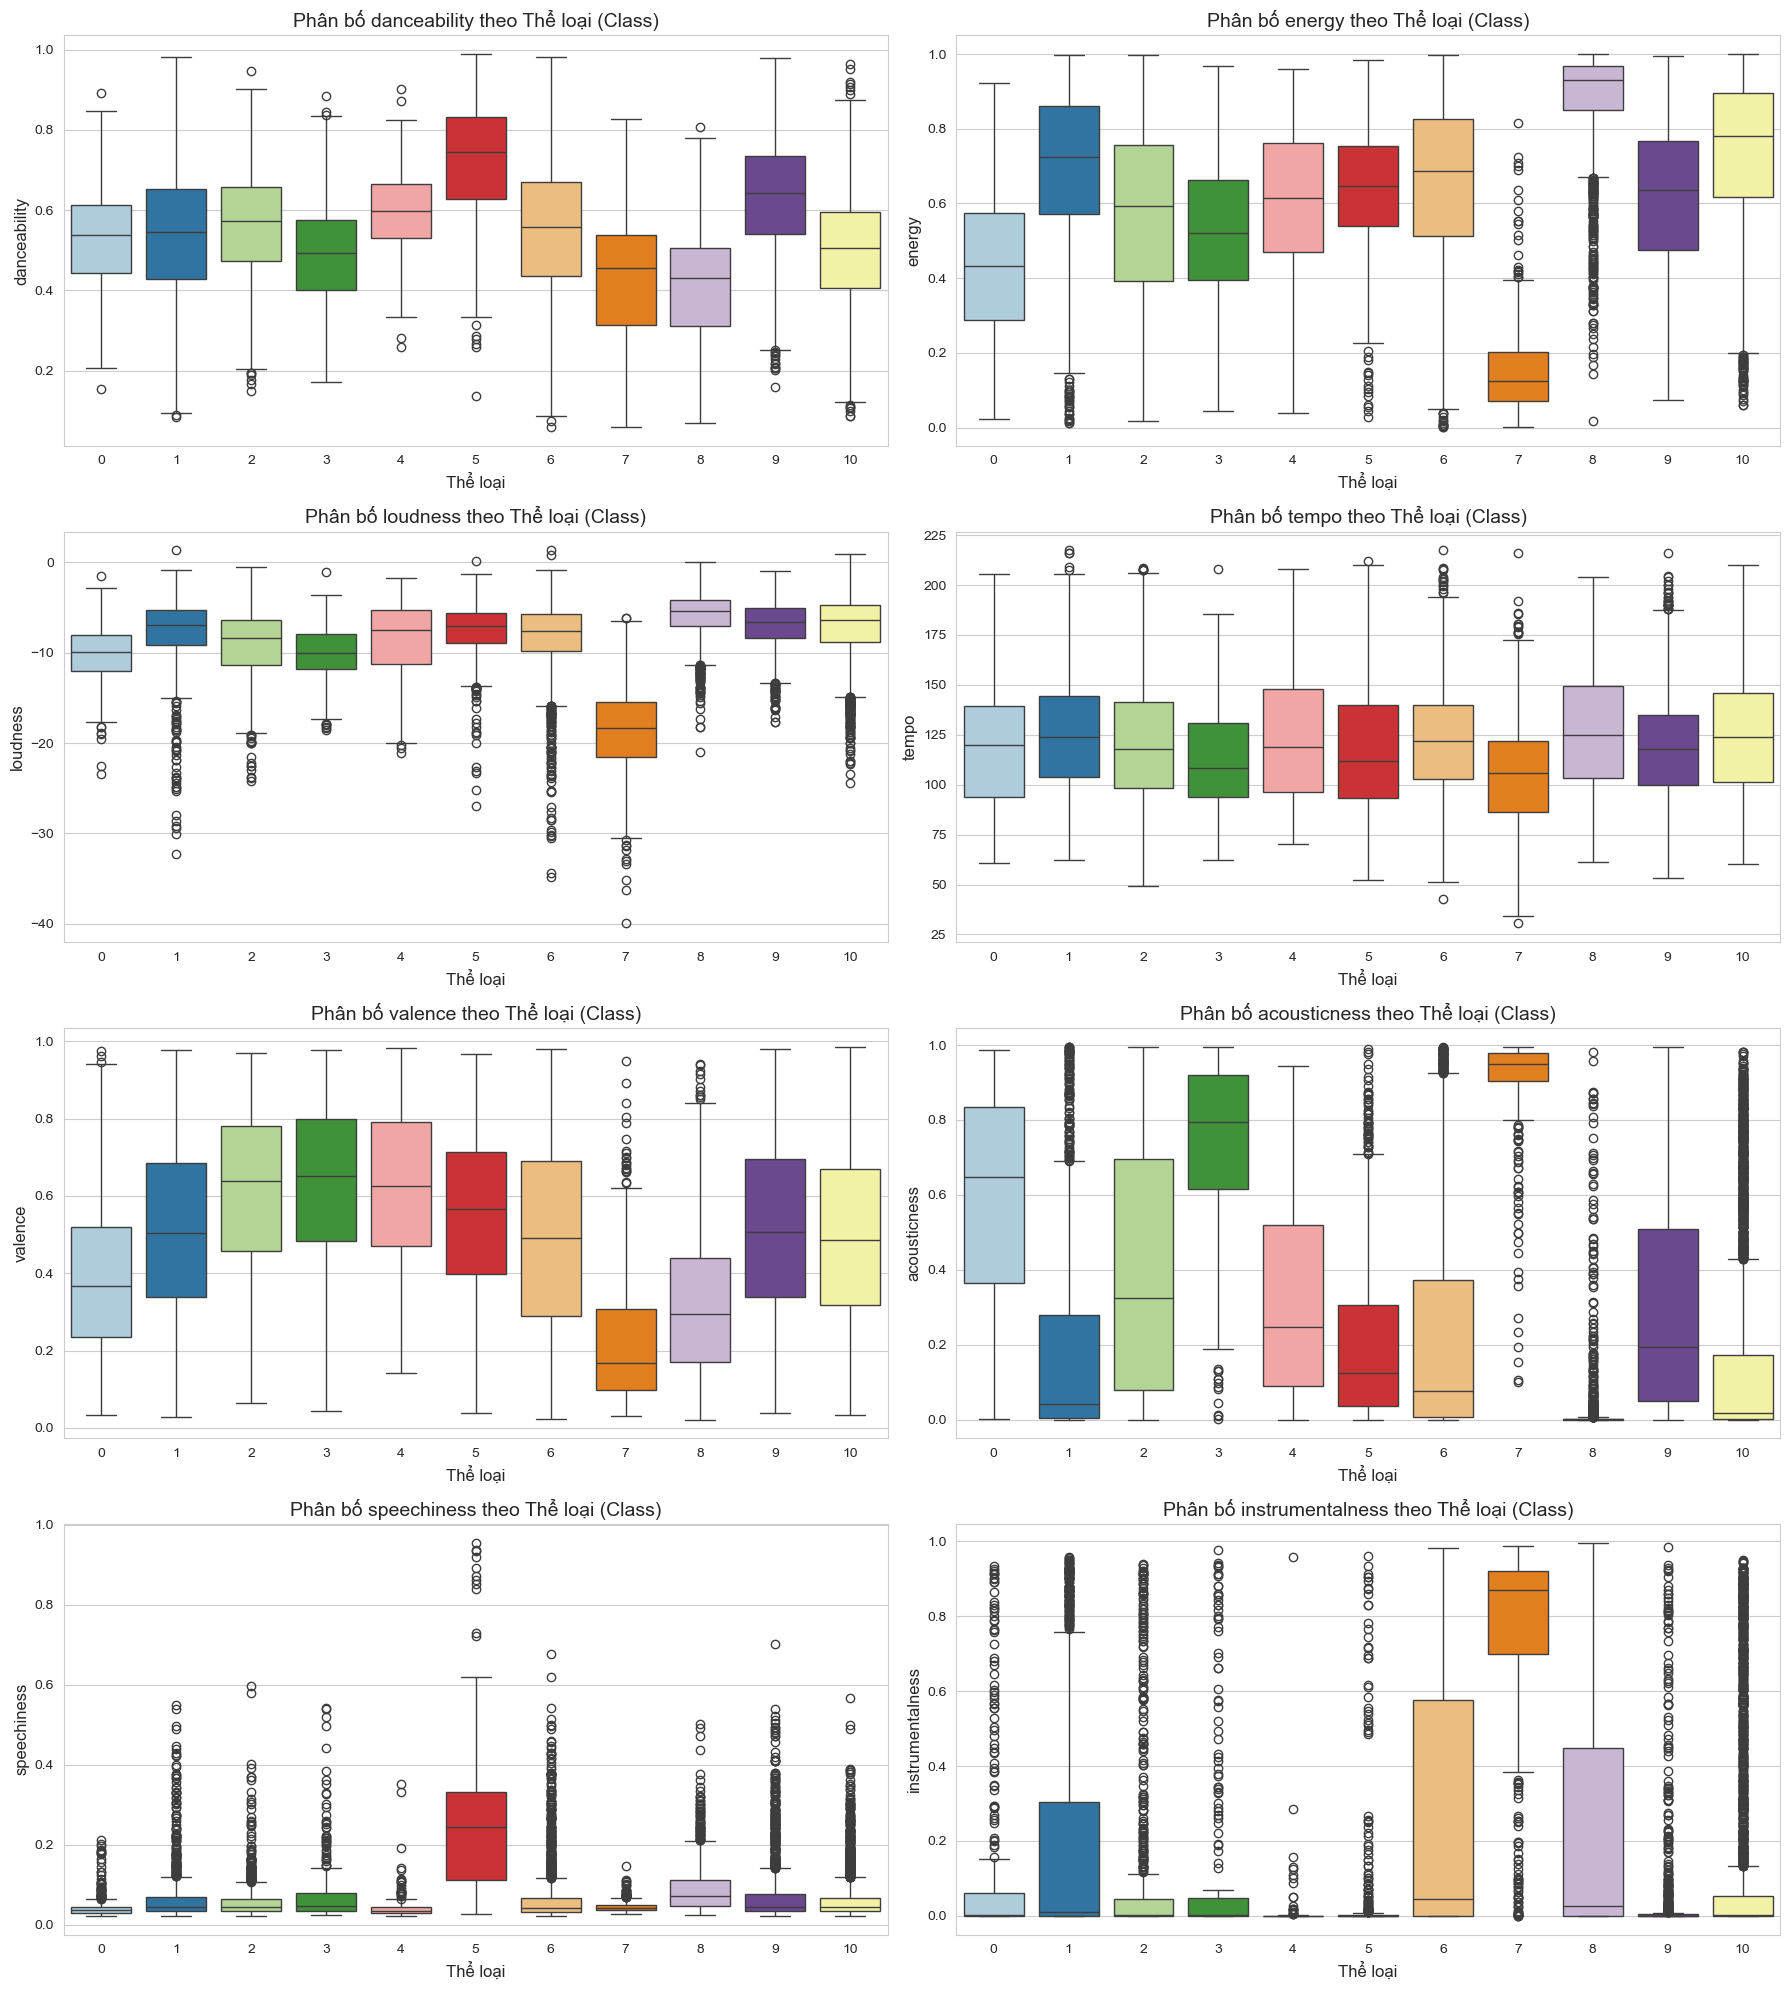

In [26]:
# Phân tích Đặc trưng theo Lớp (Bivariate Analysis - Box Plots)
if not df_train.empty:
    key_features = ['danceability', 'energy', 'loudness', 'tempo', 
                    'valence', 'acousticness', 'speechiness', 'instrumentalness']
    
    # 
    
    plt.figure(figsize=(18, 20))

    for i, feature in enumerate(key_features):
        plt.subplot(4, 2, i + 1)
        sns.boxplot(x='Class', y=feature, data=df_train, palette='Paired')
        plt.title(f'Phân bố {feature} theo Thể loại (Class)', fontsize=14)
        plt.xlabel('Thể loại', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.xticks(rotation=0)

    plt.tight_layout()

    plt.savefig('./doc/fig/feature_boxplots.png') 
    plt.show()

### 7. Phân tích Đặc trưng theo Lớp (Box Plots)

Box Plots cho thấy khả năng phân biệt lớp của các đặc trưng:

- **Đặc trưng Phân loại Tốt:**
    - **`acousticness`:** Phân bố của Acoustic/Folk (Class 1) khác biệt rõ rệt so với các Class khác (có giá trị acousticness cao hơn nhiều).
    - **`energy` / `loudness`:** Phân bố của Metal/Rock (Class 8, 6) và Pop (Class 9) có xu hướng có năng lượng và độ lớn (loudness) cao hơn so với Blues (Class 2) hoặc Acoustic/Folk (Class 1).
- **Đặc trưng Phân loại Trung bình:**
    - **`danceability` / `valence`:** Có sự chồng chéo lớn giữa các Class, nhưng các Class như HipHop (Class 5) có xu hướng `danceability` cao hơn, và các Class như Indie/Alt (Class 10, 11) có thể có `valence` (tích cực) thấp hơn.
- **Đặc trưng có nhiều Ngoại lai (Outliers):** `loudness`, `tempo`, và `duration_in min/ms` có nhiều điểm nằm ngoài râu (whiskers), xác nhận cần xử lý ngoại lai hoặc sử dụng các mô hình ít nhạy cảm với ngoại lai.

